In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

#sc.settings.set_figure_params(dpi=80)
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

In [ ]:
import loompy as lp
import pandas as pd

In [ ]:
lf = lp.connect("placodes_pyscenic_output.loom",  validate=False , mode='r+')

In [ ]:
lf

,,CellID,AACCCAATCAGCTCTC-1,GCCAACGGTTCCACGG-1,GGAGAACCACCCTTGT-1,TGTGATGTCTCTCTTC-1,TTTCAGTGTTACGATC-1,CACAACAGTCCTGGTG-1,CCGGGTAGTACCGGCT-1,CCTCTCCGTTGTAGCT-1,GTGTGATGTTAGTCGT-1,GTTCGCTGTGAAGCTG-1,...
,,RegulonsAUC,"(0.07379358, 0.08193693, 0.02477627, 0., 0., 0.08156861, 0.01144901, 0.01196185, 0., 0.01987912, 0.01375964, 0., 0., 0.0548122, 0.07677986, 0.09302226, 0.0257238, 0.1129157, 0.13616912, 0.12108906, 0., 0.04923949, 0.06155021, 0.00019335, 0.02273536, 0.06399005, 0.02820244, 0.00671069, 0.00588187, 0.06874672, 0.1461528, 0., 0., 0.0929399, 0.01344848, 0., 0.01611503, 0.12635905, 0.09901875, 0., 0.07400797, 0.06378362, 0.00785825, 0.09474646, 0.06672854, 0.02565094, 0.12613669, 0., 0.05752392, 0.04684055, 0.04507755, 0.12434466, 0., 0.05921088, 0.0515529, 0.07039039, 0.06730397, 0.06581944, 0.0509271, 0.03307922, 0., 0.0796877, 0.01612232, 0., 0.02071685, 0.01175696, 0.0266048, 0., 0., 0.0919058, 0.05130684, 0.0137957, 0., 0., 0.01643704, 0.01783027, 0.00950528, 0.00817737, 0.04943831, 0.0123421, 0.14563032, 0., 0.04946726, 0.05898522, 0.05485863, 0.02535922, 0.00820553, 0.07510527, 0.01594384, 0.10672854, 0.13476411, 0., 0., 0., 0.05627184, 0.04299405, 0., 0.04313612, 0.08706114, 0.12276162, 0., 0.02436479, 0.01954065, 0.02209701, 0.00119955, 0., 0.0520962, 0., 0.01671823, 0.18435808, 0.00274985, 0.21427047, 0.06475399, 0.0683911, 0.0288641, 0.02276966, 0.07109109, 0.04420629, 0., 0.02363479, 0.10228555, 0.04737046, 0., 0.10880047, 0.04269045, 0.12128657, 0.04828196, 0., 0., 0.0310535, 0.00839417, 0.01952823, 0.0123421, 0.04148797, 0.0026811, 0.04006782, 0.14877406, 0.04796566, 0., 0.02561872, 0.01772935, 0., 0.02180008, 0., 0.00256187, 0.02979245, 0., 0.03654949, 0.05265, 0.04313653, 0.0836794, 0.02755569, 0., 0., 0.01687966, 0.07036776, 0.05452777, 0.04696153, 0.0344884, 0., 0.4579273, 0.01268852, 0.01416719, 0.13621565, 0., 0., 0.06123181, 0., 0., 0.02334508, 0.00880197, 0., 0., 0.03367492, 0., 0., 0., 0., 0.00844934, 0.01613818, 0., 0.07646945, 0., 0.10985648, 0., 0., 0., 0., 0.07078983, 0., 0.02216177, 0., 0.00894929, 0.00566236, 0.00734725, 0., 0.08964089, 0.05430953, 0., 0.10153087, 0.06255908, 0.00022557, 0.0737816, 0.04608084, 0.02910176, 0.01714359, 0., 0., 0.03381284, 0., 0., 0.02146989, 0.09269694, 0., 0.07358936, 0.06391758, 0.06813212, 0., 0.02765974, 0.04614038, 0.12616675, 0.04838554, 0.0221191, 0., 0., 0.07353442, 0.01447354, 0.09912688, 0.10476575, 0.14124897, 0., 0.30191415, 0.02681703, 0.02419008, 0.03177365, 0.05730155, 0.06728538, 0.16482142, 0.01610824, 0.03582281, 0.01341138, 0.02629544, 0.0278054, 0., 0.07803558, 0., 0., 0.15108828, 0.01245084, 0.00275208, 0.01674698, 0.03069784, 0.03157662, 0.04670786, 0.01241503, 0.06159027, 0., 0.09788493, 0.34097061, 0.05434859, 0.04291172, 0.04655244, 0., 0., 0.12921693, 0., 0.01053007, 0., 0.04408353, 0.04094629, 0.04295969, 0.00430201, 0.040002, 0.05753113, 0.01474361, 0.02217066, 0., 0., 0.02693433, 0.07722879, 0.04781136, 0.06885871, 0.13095633, 0.09138177, 0., 0., 0.03659979, 0.35006961, 0., 0.04331013, 0., 0.05822561, 0.07208359, 0.07175957, 0.03927816, 0.06662698, 0., 0.08131714, 0.06542654, 0.15563955, 0.03349396, 0.02462966, 0.06381406, 0., 0., 0.00701212, 0., 0., 0.07027512, 0.0110485, 0.00647832, 0.13352116, 0.03592534, 0.12874604, 0., 0.17096751, 0., 0.07691215, 0.10780809, 0.09987847, 0.00947409, 0.0484118, 0.08028206, 0., 0., 0., 0.06036663, 0.03863269, 0., 0.01887084, 0.13987021, 0., 0.02252825, 0., 0.15197216, 0.09925666, 0.10442645, 0., 0., 0.03129396, 0.09988446, 0.03198542, 0.06216761, 0., 0.01669444, 0.17459397, 0., 0.03269142, 0., 0.05484552, 0.01201037, 0.11562678, 0., 0., 0.12239361, 0.05368537, 0.02182425, 0., 0.07846718, 0.0387007, 0., 0.05576378, 0.12907696, 0., 0.01070622, 0.13047779, 0.02714368, 0., 0.11529538, 0.01784333, 0.01887084, 0.19118329, 0., 0.0372319, 0.04831935, 0.02423305, 0.02764888, 0., 0.06333247, 0.18876965, 0.02721384, 0.00879093, 0.09642287, 0., 0., 0.00085481, 7.31590059e-05, 0., 0., 0., 0.10247486, 0., 0.

In [ ]:
lf.ca.CellID

array(['AACCCAATCAGCTCTC-1', 'GCCAACGGTTCCACGG-1', 'GGAGAACCACCCTTGT-1',
       ..., 'TTTGATCGTTACCGTA-1-3', 'TTTGGAGGTTAATCGC-1-3',
       'TTTGGTTTCCTTACCG-1-3'], dtype=object)

In [ ]:
lf.ca.RegulonsAUC

array([(0.07379358, 0.08193693, 0.02477627, 0., 0.        , 0.08156861, 0.01144901, 0.01196185, 0.        , 0.01987912, 0.01375964, 0.        , 0.        , 0.0548122 , 0.07677986, 0.09302226, 0.0257238 , 0.1129157 , 0.13616912, 0.12108906, 0.        , 0.04923949, 0.06155021, 0.00019335, 0.02273536, 0.06399005, 0.02820244, 0.00671069, 0.00588187, 0.06874672, 0.1461528 , 0.        , 0.        , 0.0929399 , 0.01344848, 0.        , 0.01611503, 0.12635905, 0.09901875, 0.        , 0.07400797, 0.06378362, 0.00785825, 0.09474646, 6.67285383e-02, 0.02565094, 0.12613669, 0., 0.05752392, 0.04684055, 0.04507755, 0.12434466, 0.        , 0.05921088, 0.0515529 , 0.07039039, 0.06730397, 0.06581944, 0.0509271 , 0.03307922, 0., 0.0796877 , 0.01612232, 0.        , 0.02071685, 0.01175696, 0.0266048 , 0., 0.        , 0.0919058 , 0.05130684, 0.0137957 , 0.       , 0.        , 0.01643704, 0.01783027, 0.00950528, 0.00817737, 0.04943831, 0.0123421 , 0.14563032, 0., 0.04946726, 0.05898522, 0.05485863, 0.0253592

In [ ]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [ ]:
auc_mtx

,Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arntl(+),Arx(+),Ascl1(+),Atf1(+),...,Zfp991(+),Zfx(+),Zgpat(+),Zic1(+),Zik1(+),Zkscan8(+),Zscan10(+),Zscan12(+),Zscan20(+),Zxdc(+)
AACCCAATCAGCTCTC-1,0.073794,0.081937,0.024776,0.000000,0.000000,0.081569,0.011449,0.011962,0.000000,0.019879,...,0.000000,0.071707,0.0,0.038960,0.0,0.035189,0.000000,0.000000,0.000000,0.037545
GCCAACGGTTCCACGG-1,0.035445,0.005328,0.054000,0.000000,0.003292,0.040453,0.042827,0.000000,0.000000,0.006144,...,0.000000,0.045445,0.0,0.000000,0.0,0.000000,0.019517,0.000000,0.000000,0.000000
GGAGAACCACCCTTGT-1,0.009821,0.000000,0.079080,0.000000,0.000000,0.022388,0.019128,0.000000,0.000000,0.000000,...,0.037075,0.023428,0.0,0.022042,0.0,0.037316,0.000000,0.000000,0.000000,0.000000
TGTGATGTCTCTCTTC-1,0.031082,0.073945,0.057563,0.000000,0.000000,0.016040,0.000000,0.000000,0.000000,0.001575,...,0.000000,0.028619,0.0,0.079563,0.0,0.007992,0.000000,0.000000,0.000000,0.000000
TTTCAGTGTTACGATC-1,0.025683,0.063247,0.051541,0.000000,0.000000,0.019129,0.009681,0.000000,0.000000,0.000000,...,0.000000,0.021671,0.0,0.062548,0.0,0.000000,0.000000,0.000000,0.000000,0.026999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGCAAGAAACT-1-3,0.032526,0.043826,0.000000,0.028306,0.008662,0.030086,0.017111,0.009281,0.034674,0.011630,...,0.000000,0.042504,0.0,0.000000,0.0,0.000000,0.024521,0.000000,0.000000,0.000000
TTTCGATTCAACTACG-1-3,0.020677,0.037424,0.006684,0.000000,0.000000,0.022089,0.053682,0.032586,0.000000,0.000000,...,0.000000,0.031295,0.0,0.170920,0.0,0.000000,0.000000,0.000000,0.017788,0.039021
TTTGATCGTTACCGTA-1-3,0.018051,0.000000,0.000000,0.000000,0.003337,0.011811,0.013783,0.000000,0.004469,0.000000,...,0.000000,0.021447,0.0,0.000000,0.0,0.023266,0.000000,0.000000,0.000000,0.000000
TTTGGAGGTTAATCGC-1-3,0.027507,0.072184,0.013148,0.000000,0.008552,0.027614,0.059676,0.032070,0.015124,0.000000,...,0.000000,0.028294,0.0,0.270205,0.0,0.007154,0.000000,0.000000,0.023898,0.000000


In [ ]:
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
regulons = lf.ra.Regulons

In [ ]:
auc_mtx

,Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arntl(+),Arx(+),Ascl1(+),Atf1(+),...,Zfp991(+),Zfx(+),Zgpat(+),Zic1(+),Zik1(+),Zkscan8(+),Zscan10(+),Zscan12(+),Zscan20(+),Zxdc(+)
AACCCAATCAGCTCTC-1,0.073794,0.081937,0.024776,0.000000,0.000000,0.081569,0.011449,0.011962,0.000000,0.019879,...,0.000000,0.071707,0.0,0.038960,0.0,0.035189,0.000000,0.000000,0.000000,0.037545
GCCAACGGTTCCACGG-1,0.035445,0.005328,0.054000,0.000000,0.003292,0.040453,0.042827,0.000000,0.000000,0.006144,...,0.000000,0.045445,0.0,0.000000,0.0,0.000000,0.019517,0.000000,0.000000,0.000000
GGAGAACCACCCTTGT-1,0.009821,0.000000,0.079080,0.000000,0.000000,0.022388,0.019128,0.000000,0.000000,0.000000,...,0.037075,0.023428,0.0,0.022042,0.0,0.037316,0.000000,0.000000,0.000000,0.000000
TGTGATGTCTCTCTTC-1,0.031082,0.073945,0.057563,0.000000,0.000000,0.016040,0.000000,0.000000,0.000000,0.001575,...,0.000000,0.028619,0.0,0.079563,0.0,0.007992,0.000000,0.000000,0.000000,0.000000
TTTCAGTGTTACGATC-1,0.025683,0.063247,0.051541,0.000000,0.000000,0.019129,0.009681,0.000000,0.000000,0.000000,...,0.000000,0.021671,0.0,0.062548,0.0,0.000000,0.000000,0.000000,0.000000,0.026999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGCAAGAAACT-1-3,0.032526,0.043826,0.000000,0.028306,0.008662,0.030086,0.017111,0.009281,0.034674,0.011630,...,0.000000,0.042504,0.0,0.000000,0.0,0.000000,0.024521,0.000000,0.000000,0.000000
TTTCGATTCAACTACG-1-3,0.020677,0.037424,0.006684,0.000000,0.000000,0.022089,0.053682,0.032586,0.000000,0.000000,...,0.000000,0.031295,0.0,0.170920,0.0,0.000000,0.000000,0.000000,0.017788,0.039021
TTTGATCGTTACCGTA-1-3,0.018051,0.000000,0.000000,0.000000,0.003337,0.011811,0.013783,0.000000,0.004469,0.000000,...,0.000000,0.021447,0.0,0.000000,0.0,0.023266,0.000000,0.000000,0.000000,0.000000
TTTGGAGGTTAATCGC-1-3,0.027507,0.072184,0.013148,0.000000,0.008552,0.027614,0.059676,0.032070,0.015124,0.000000,...,0.000000,0.028294,0.0,0.270205,0.0,0.007154,0.000000,0.000000,0.023898,0.000000


In [ ]:
res=pd.concat([pd.Series(r.tolist(),index=regulons.dtype.names) for r in regulons],axis=1)

In [ ]:
res.to_csv("epcam_placods_7_16_06.csv")


In [ ]:
res

,0,1,2,3,4,5,6,7,8,9,...,25855,25856,25857,25858,25859,25860,25861,25862,25863,25864
Ahdc1(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ahr(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alx3(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alx4(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arid3a(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zkscan8(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan10(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan12(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zscan20(+),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
adata_genes=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/Placodes_tragectory/Trigem/Triminal_TF_UMAP.h5ad')
#adata=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/h5ad/scenic_e8_e9_umap_reg.h5ad')
#sc.pl.umap(adata_genes,color=["leiden", 'Smad9'], legend_loc='on data', size=100, color_map='magma')

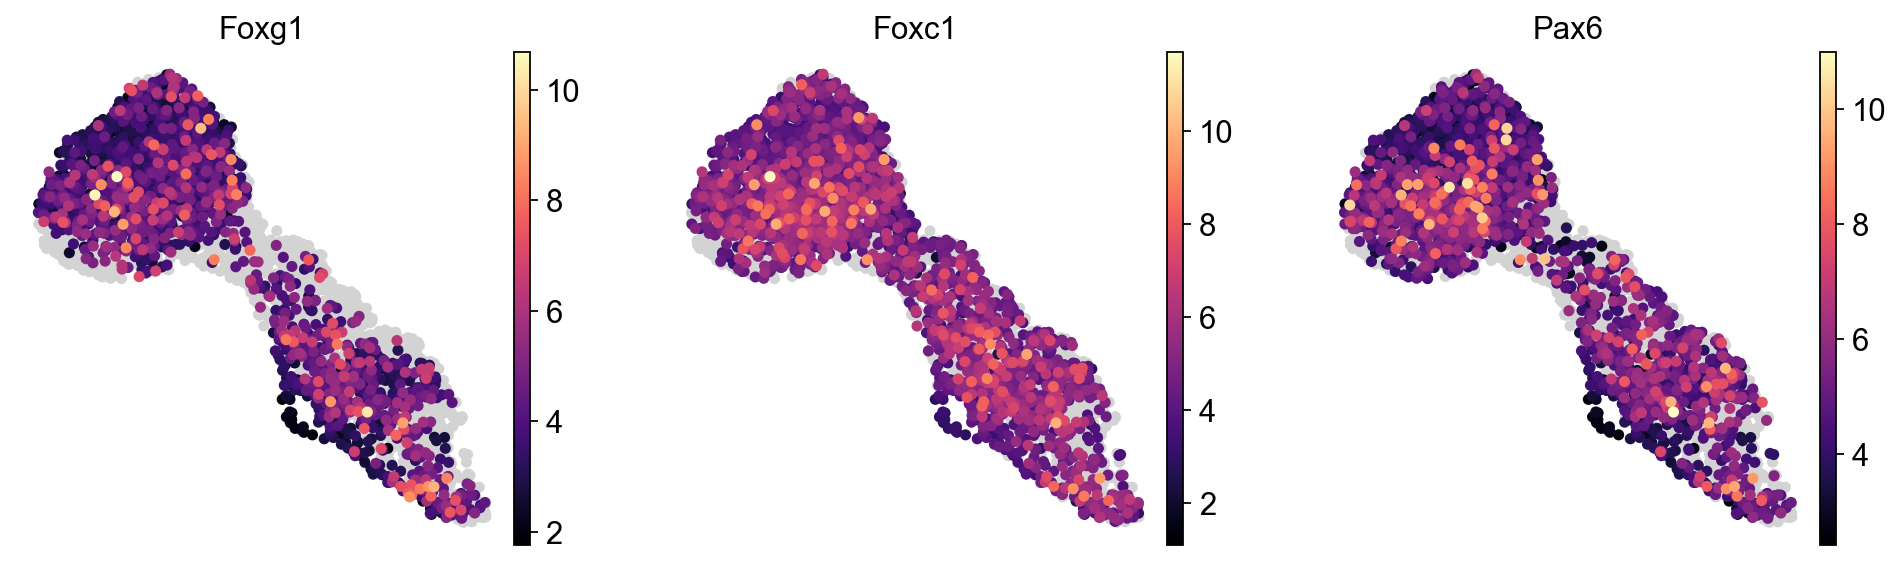

In [ ]:
sc.pl.umap(adata_genes,color=['Foxg1', 'Foxc1', 'Pax6'], legend_loc='on data', size=100, color_map='magma', frameon=False)

In [ ]:
adata_genes

AnnData object with n_obs × n_vars = 4381 × 1729
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
auc_mtx

,Ahdc1(+),Ahr(+),Alx3(+),Alx4(+),Arid3a(+),Arid5b(+),Arntl(+),Arx(+),Ascl1(+),Atf1(+),...,Zfp991(+),Zfx(+),Zgpat(+),Zic1(+),Zik1(+),Zkscan8(+),Zscan10(+),Zscan12(+),Zscan20(+),Zxdc(+)
AACCCAATCAGCTCTC-1,0.073794,0.081937,0.024776,0.000000,0.000000,0.081569,0.011449,0.011962,0.000000,0.019879,...,0.000000,0.071707,0.0,0.038960,0.0,0.035189,0.000000,0.000000,0.000000,0.037545
GCCAACGGTTCCACGG-1,0.035445,0.005328,0.054000,0.000000,0.003292,0.040453,0.042827,0.000000,0.000000,0.006144,...,0.000000,0.045445,0.0,0.000000,0.0,0.000000,0.019517,0.000000,0.000000,0.000000
GGAGAACCACCCTTGT-1,0.009821,0.000000,0.079080,0.000000,0.000000,0.022388,0.019128,0.000000,0.000000,0.000000,...,0.037075,0.023428,0.0,0.022042,0.0,0.037316,0.000000,0.000000,0.000000,0.000000
TGTGATGTCTCTCTTC-1,0.031082,0.073945,0.057563,0.000000,0.000000,0.016040,0.000000,0.000000,0.000000,0.001575,...,0.000000,0.028619,0.0,0.079563,0.0,0.007992,0.000000,0.000000,0.000000,0.000000
TTTCAGTGTTACGATC-1,0.025683,0.063247,0.051541,0.000000,0.000000,0.019129,0.009681,0.000000,0.000000,0.000000,...,0.000000,0.021671,0.0,0.062548,0.0,0.000000,0.000000,0.000000,0.000000,0.026999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGCAAGAAACT-1-3,0.032526,0.043826,0.000000,0.028306,0.008662,0.030086,0.017111,0.009281,0.034674,0.011630,...,0.000000,0.042504,0.0,0.000000,0.0,0.000000,0.024521,0.000000,0.000000,0.000000
TTTCGATTCAACTACG-1-3,0.020677,0.037424,0.006684,0.000000,0.000000,0.022089,0.053682,0.032586,0.000000,0.000000,...,0.000000,0.031295,0.0,0.170920,0.0,0.000000,0.000000,0.000000,0.017788,0.039021
TTTGATCGTTACCGTA-1-3,0.018051,0.000000,0.000000,0.000000,0.003337,0.011811,0.013783,0.000000,0.004469,0.000000,...,0.000000,0.021447,0.0,0.000000,0.0,0.023266,0.000000,0.000000,0.000000,0.000000
TTTGGAGGTTAATCGC-1-3,0.027507,0.072184,0.013148,0.000000,0.008552,0.027614,0.059676,0.032070,0.015124,0.000000,...,0.000000,0.028294,0.0,0.270205,0.0,0.007154,0.000000,0.000000,0.023898,0.000000


In [ ]:
adata=sc.AnnData(auc_mtx,
           obs=adata_genes.obs,uns=adata_genes.uns,obsm=adata_genes.obsm)

/tmp/ipykernel_21324/4019417087.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(auc_mtx,


In [ ]:
adata

AnnData object with n_obs × n_vars = 4381 × 403
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'

In [ ]:
adata.write_h5ad('adata_Trigem_rag.h5ad')

In [ ]:
# tragectory on regulons

In [ ]:
import scFates as scf

In [ ]:
scf.tl.curve(adata,Nodes=55, use_rep="X_umap",epg_lambda=0.01, epg_mu=50)

inferring a principal curve --> parameters used 
    55 principal points, mu = 50, lambda = 0.01
    finished (0:00:23) --> added 
    .uns['epg'] dictionnary containing inferred elastic curve generated from elpigraph.
    .obsm['X_R'] hard assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'], coordinates of principal points in representation space.


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


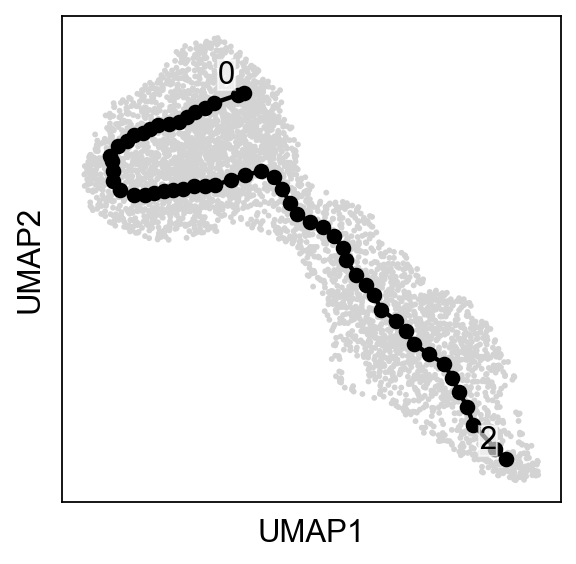

In [ ]:
scf.pl.graph(adata,basis="umap")

In [ ]:
scf.tl.root(adata,0)

node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [ ]:
scf.tl.pseudotime(adata,n_jobs=20)

projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


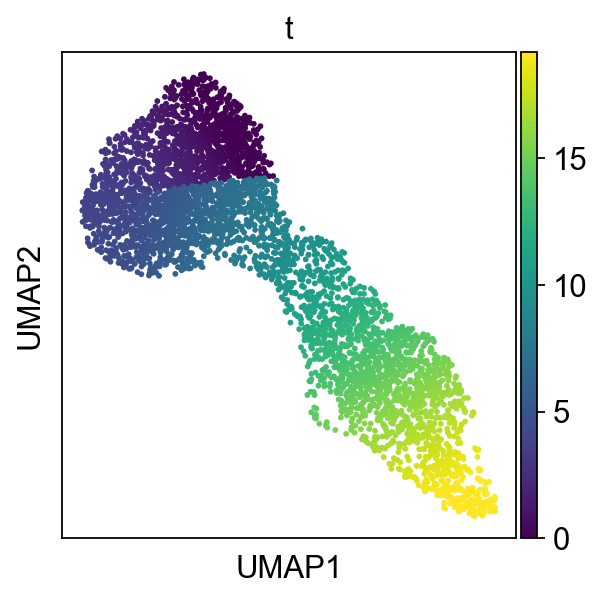

In [ ]:
sc.pl.umap(adata,color="t")

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


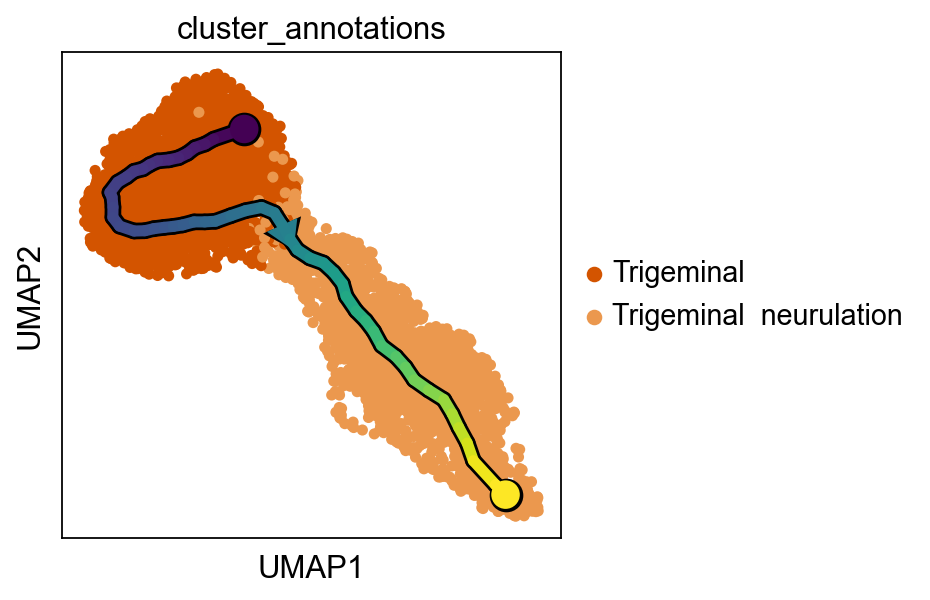

In [ ]:
scf.pl.trajectory(adata,basis="umap",arrows=True,arrow_offset=1,  color_cells='cluster_annotations', size=100,
                 # save='Epi_tr_21_08.svg'
                 )

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


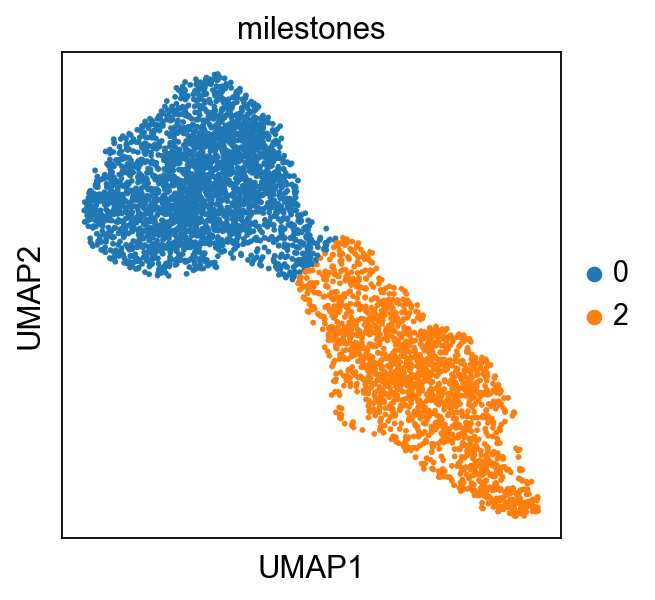

In [ ]:
sc.pl.umap(adata,color="milestones")

Estimation of deviation from linearity
    cells on the bridge: 100%|██████████| 2629/2629 [00:04<00:00, 577.93it/s]


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scFates/tools/linearity_deviation.py:144: RuntimeWarning: invalid value encountered in divide
  return rs.mean(axis=1) / X_all.std(axis=0)
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


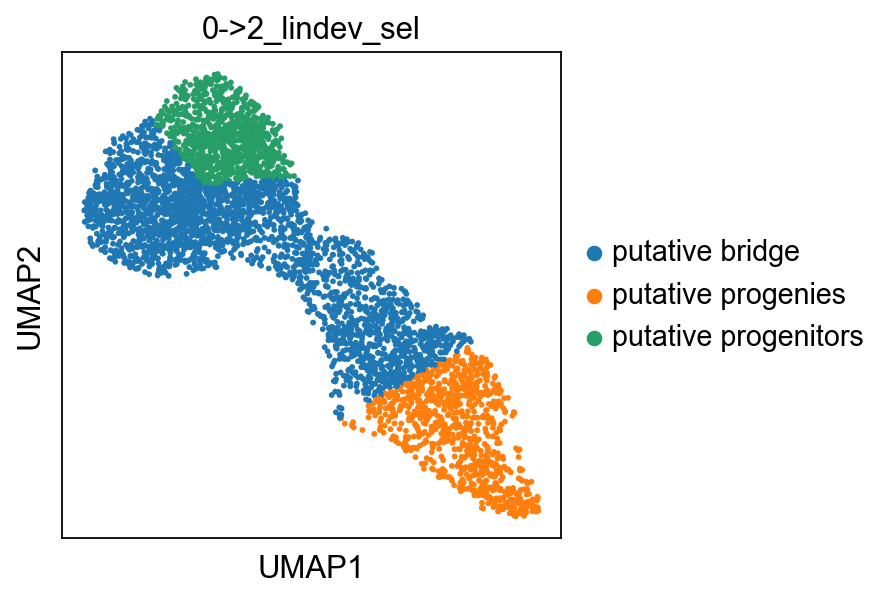

    finished (0:00:04) --> added 
    .var['0->2_rss'], pearson residuals of the linear fit.
    .obs['0->2_lindev_sel'], cell selections used for the test.


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scFates/tools/linearity_deviation.py:164: RuntimeWarning: Mean of empty slice
  adata.var[name + "_rss"] = np.nanmean(np.vstack(rss), axis=0)


In [ ]:
scf.tl.linearity_deviation(adata,
                           start_milestone='0',
                           end_milestone='2',
                      n_jobs=20,
                           plot=True,basis="umap")

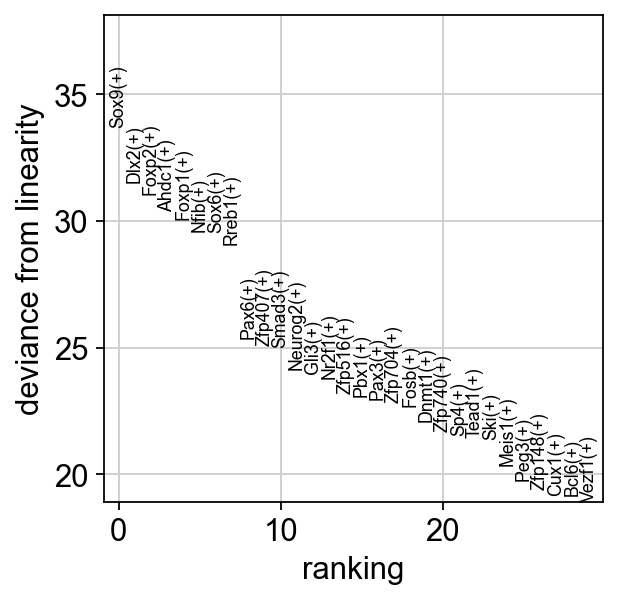

In [ ]:
scf.pl.linearity_deviation(adata,
                           start_milestone="0",
                           end_milestone="2")

In [ ]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):

    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np

    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)

    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))

    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


In [ ]:
scf.tl.test_association(adata,n_jobs=20)

test features for association with the trajectory
    single mapping :   0%|          | 0/403 [00:00<?, ?it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :   7%|▋         | 29/403 [00:01<00:14, 26.57it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  14%|█▍        | 58/403 [00:01<00:11, 29.09it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  17%|█▋        | 70/403 [00:02<00:11, 29.30it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  26%|██▌       | 103/403 [00:03<00:09, 30.26it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  28%|██▊       | 112/403 [00:03<00:09, 30.68it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  30%|███       | 121/403 [00:03<00:08, 31.42it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  38%|███▊      | 153/403 [00:04<00:07, 31.77it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  43%|████▎     | 174/403 [00:05<00:07, 32.19it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  55%|█████▍    | 221/403 [00:06<00:05, 32.55it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  71%|███████▏  | 288/403 [00:08<00:03, 33.18it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  78%|███████▊  | 316/403 [00:09<00:02, 33.30it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  80%|████████  | 323/403 [00:09<00:02, 33.11it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  84%|████████▍ | 338/403 [00:10<00:01, 33.37it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  94%|█████████▎| 377/403 [00:11<00:00, 33.28it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping : 100%|██████████| 403/403 [00:11<00:00, 33.64it/s]
    found 0 significant features (0:00:11) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

In [ ]:
adata1=adata.copy()

reapplied filters, 256 significant features


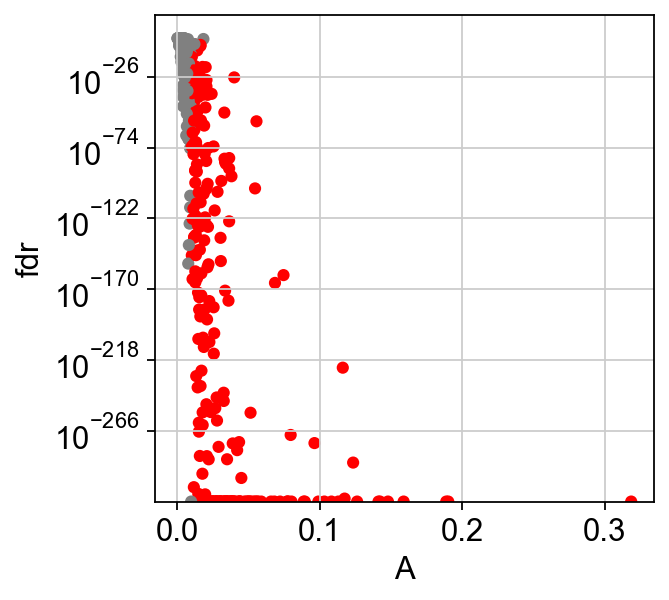

In [ ]:
scf.tl.test_association(adata1,reapply_filters=True,A_cut=.01)
scf.pl.test_association(adata1)

In [ ]:
scf.tl.fit(adata1,n_jobs=20)

fit features associated with the trajectory
    single mapping :  11%|█         | 28/256 [00:01<00:13, 16.50it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  13%|█▎        | 33/256 [00:02<00:13, 16.02it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  29%|██▉       | 75/256 [00:03<00:09, 19.56it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  34%|███▍      | 87/256 [00:04<00:08, 20.09it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  36%|███▌      | 92/256 [00:04<00:08, 20.27it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  49%|████▉     | 125/256 [00:06<00:06, 20.50it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  59%|█████▊    | 150/256 [00:07<00:05, 21.01it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  65%|██████▌   | 167/256 [00:08<00:04, 20.84it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  68%|██████▊   | 173/256 [00:08<00:03, 21.07it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping :  84%|████████▍ | 216/256 [00:10<00:01, 21.29it/s]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

    single mapping : 100%|██████████| 256/256 [00:11<00:00, 21.39it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:12) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [ ]:
scf.tl.cluster(adata1,n_neighbors=60,metric="correlation", resolution=0.3)

Clustering features using fitted layer
computing PCA
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
    finished (0:00:00) --> added 
    .var['cluters'] identified modules.


In [ ]:
adata1.var.cluters.unique()

['0', '2', '1']
Categories (3, object): ['0', '1', '2']

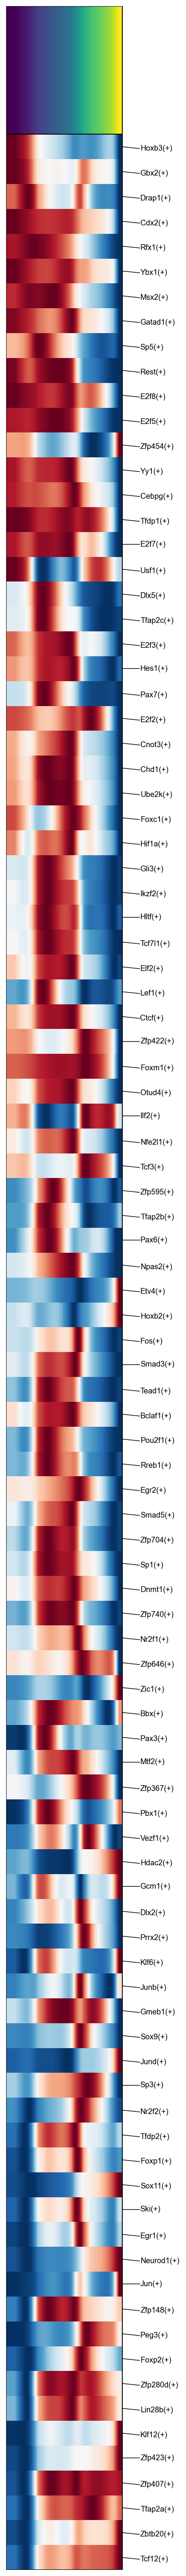

In [ ]:
g2=scf.pl.trends(adata1,features=adata1.var_names[adata1.var.cluters=='1'],basis="umap", n_features=200,return_genes=True,
              plot_emb=False,
              figsize=(4,55)
                )

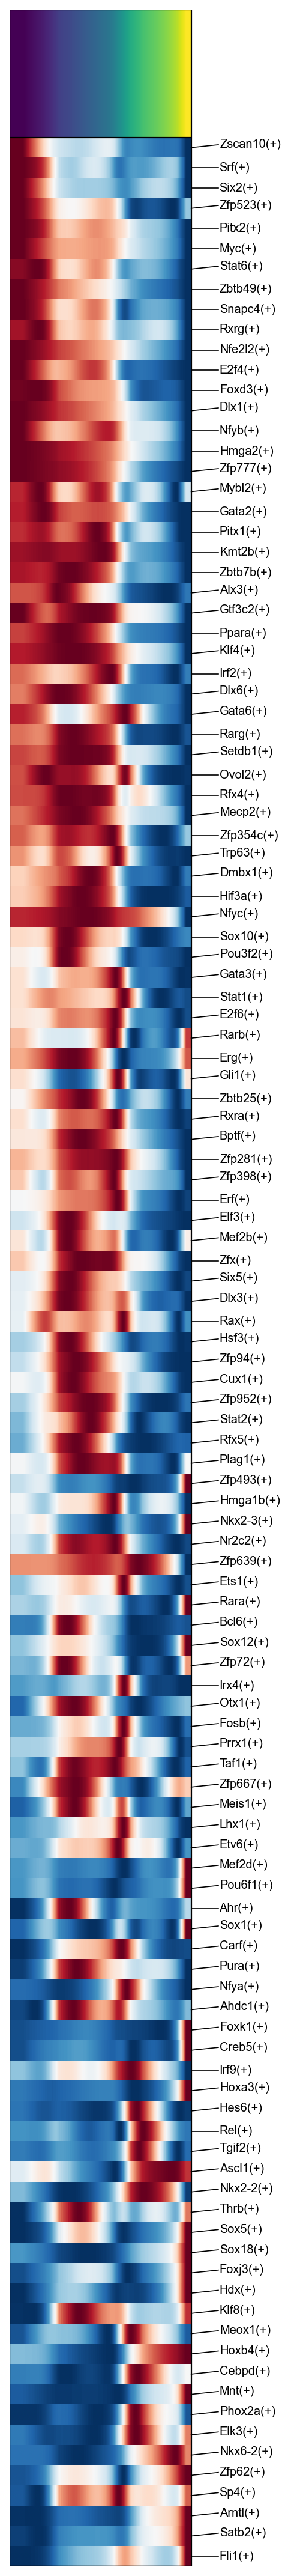

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:56: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/rpy2/

In [ ]:
g1=scf.pl.trends(adata1,features=adata1.var_names[adata1.var.cluters=='0'],basis="umap", n_features=200,return_genes=True,
              plot_emb=False,
              figsize=(4,35)
                )

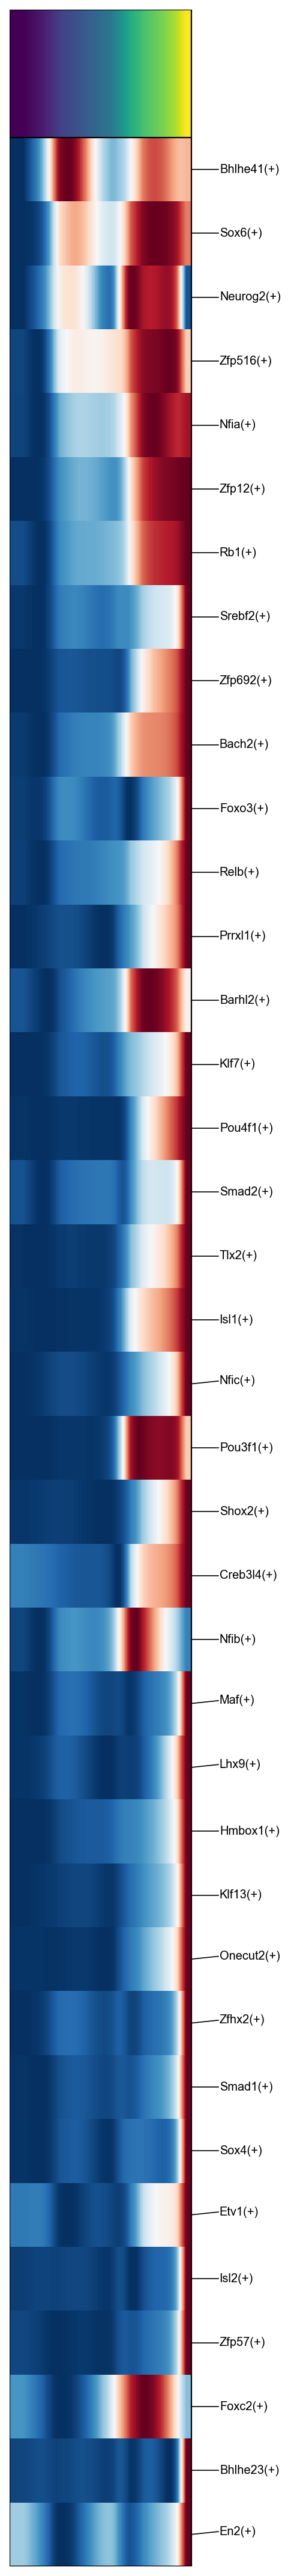

In [ ]:
g1=scf.pl.trends(adata1,features=adata1.var_names[adata1.var.cluters=='2'],basis="umap", n_features=200,return_genes=True,
              plot_emb=False,
              figsize=(4,35)
                )

##

In [ ]:
short=["Zscan10(+)", "Srf(+)", "Six2(+)", "Zfp523(+)", "Pitx2(+)", "Myc(+)", "Stat6(+)", "Zbtb49(+)", "Snapc4(+)", "Rxrg(+)",
"Nfe2l2(+)", "E2f4(+)", "Foxd3(+)", "Dlx1(+)", "Nfyb(+)", "Hmga2(+)", "Zfp777(+)", "Mybl2(+)", "Gata2(+)", "Pitx1(+)",
"Kmt2b(+)", "Zbtb7b(+)", "Alx3(+)", "Gtf3c2(+)", "Ppara(+)", "Klf4(+)", "Irf2(+)", "Dlx6(+)", "Gata6(+)", "Rarg(+)",
"Setdb1(+)", "Ovol2(+)", "Rfx4(+)", "Mecp2(+)", "Zfp354c(+)", "Trp63(+)", "Dmbx1(+)", "Hif3a(+)", "Gli3(+)", "Ikzf2(+)",
"Hltf(+)", "Tcf7l1(+)", "Zfp595(+)", "Tfap2b(+)", "Pax6(+)", "Npas2(+)", "Fos(+)", "Smad3(+)", "Tead1(+)", "Bclaf1(+)",
"Pou2f1(+)", "Rreb1(+)", "Egr2(+)", "Smad5(+)", "Zfp704(+)", "Sp1(+)", "Dnmt1(+)", "Zfp740(+)", "Zfx(+)", "Six5(+)", "Dlx3(+)", "Rax(+)", "Hsf3(+)", "Zfp94(+)",
"Cux1(+)", "Zfp952(+)", "Stat2(+)", "Rfx5(+)","Pax3(+)",
"Mtf2(+)", "Zfp367(+)", "Peg3(+)","Zfp280d(+)", "Lin28b(+)",  "Zfp407(+)", "Tfap2a(+)", "Zbtb20(+)",
"Tcf12(+)", "Sox5(+)", "Sox18(+)", "Foxj3(+)", "Hdx(+)", "Klf12(+)", "Zfp423(+)",


]

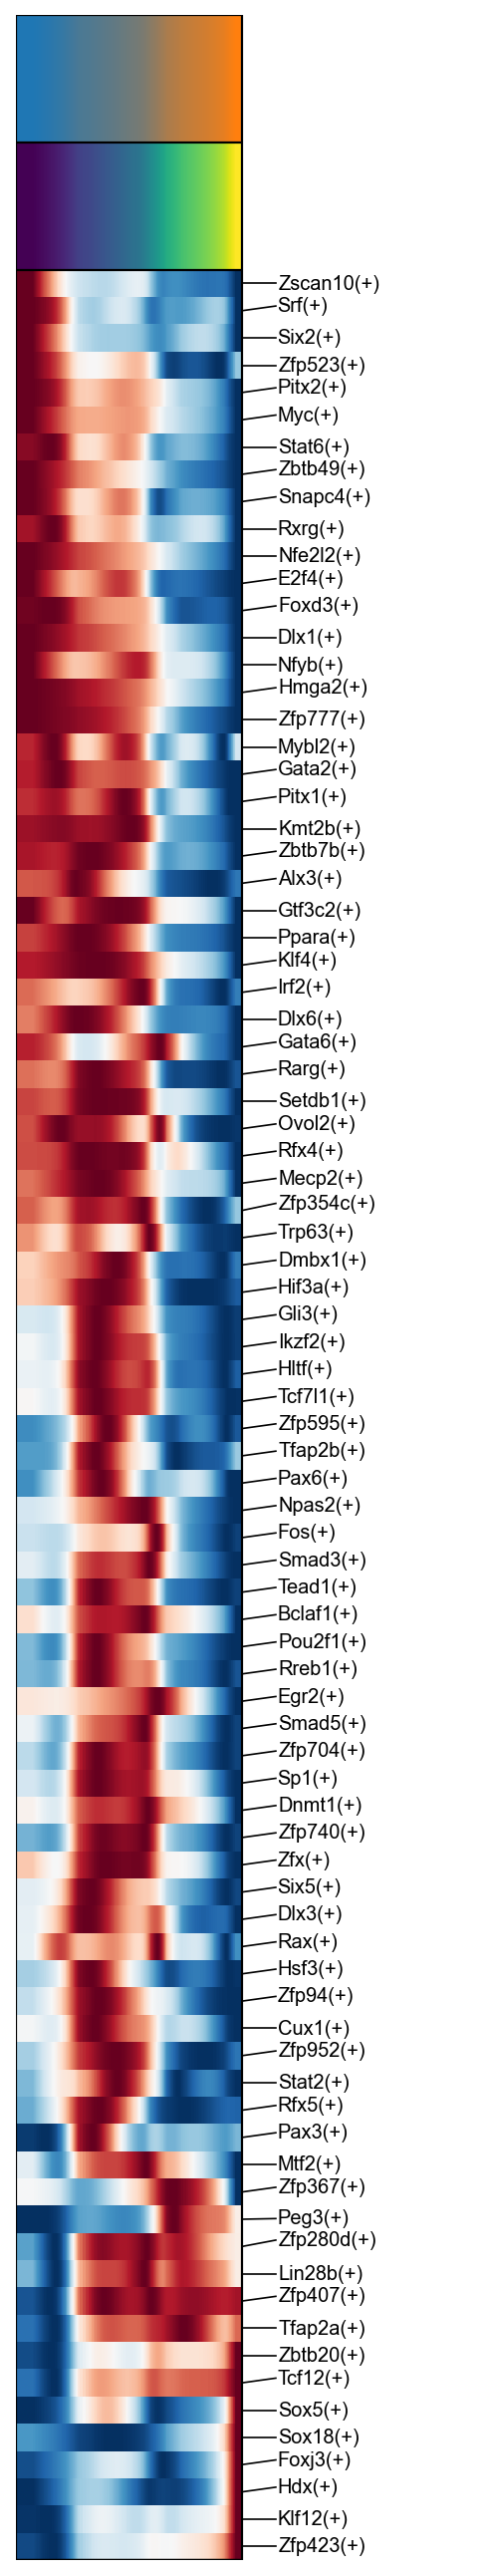

In [ ]:
# Filter genes to keep only those present in adata
valid_genes = [g for g in short if g in adata.var_names]

# Set figure height dynamically (no empty space)
fig_height = len(valid_genes) * 0.25

g = scf.pl.trends(
    adata1,
    features=valid_genes,   # directly use your list
    basis="umap",
    annot="milestones",
    plot_emb=False,
    heatmap_space=0.0,
    figsize=(4, fig_height),
    ordering=None,
    return_genes=False,
    n_features=len(valid_genes)   # match exactly the list length
)
plt.savefig("figures/Trigem_redulons_1.svg")